In [73]:
import xarray as xa
import pylab as pl
import ice_conc_algo as ia
import importlib
from scipy import signal
from cmocean import cm
import numpy as np
import pandas as pd
importlib.reload(ia)
importlib.reload(xa)

<module 'xarray' from '/data/opt/anaconda3/lib/python3.6/site-packages/xarray/__init__.py'>

In [117]:
ds = xa.open_mfdataset('/mnt/isilon/home/jol/ice_conc/amsr2/gridded_brightness_temperatures/brightness_temperatures_nh_polstere-100_amsr2_*.nc')

In [118]:
ic_nasa = ia.nasa(ds['tb19v'], ds['tb19h'], ds['tb37v'])

In [55]:
# is_land = xa.ufuncs.logical_not(ds['status_flag'] == 100)
# ic_nasa.where(~is_land).isel(time=10).plot()
# pl.show()

/data/opt/anaconda3/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/data/opt/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


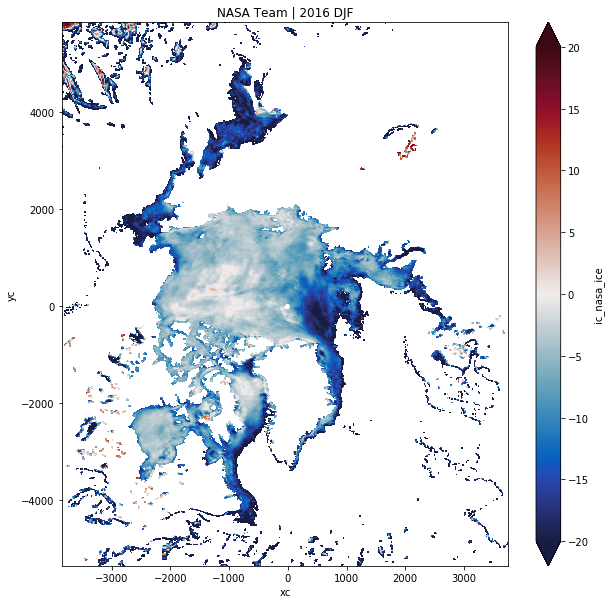

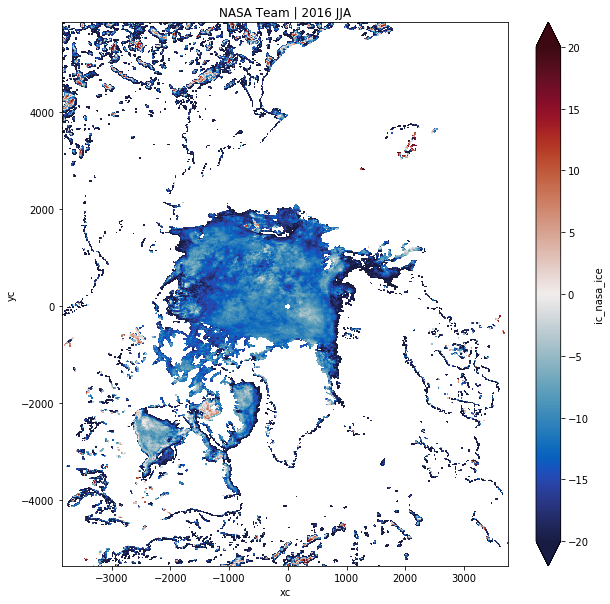

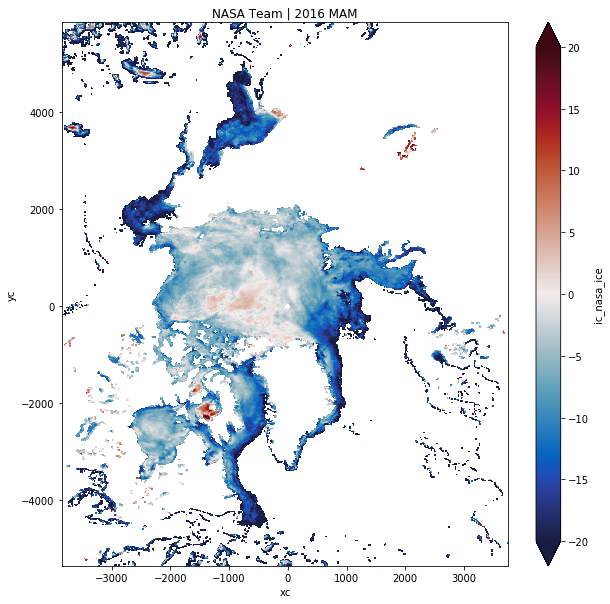

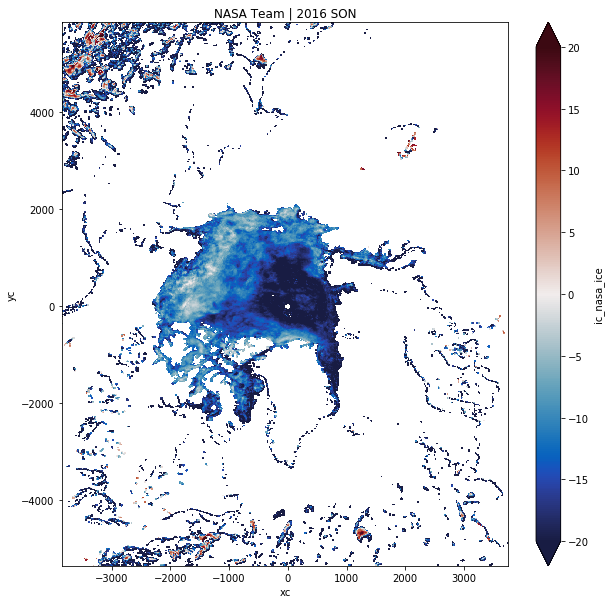

In [150]:
is_land = (ds['status_flag'] == 100).isel(time=0)
ic_nasa_ice = 100*ic_nasa.where(~is_land & (ic_nasa > 0.75))
ds['ic_nasa_ice'] = ic_nasa_ice

dates = pd.DatetimeIndex(ds.time.to_series())
season_years = dates.year
season_years.where(dates.month == 12, dates.year + 1)
ds['season_years'] = season_years

for year, dsyears in ds.groupby('season_years'):
    for season, dsyearsmonths in dsyears.groupby('time.season'):
        ice = dsyearsmonths['ic_nasa_ice']
        (ice - 100).mean(dim='time').plot(vmin=-20, vmax=20, cmap=cm.balance, figsize=(10,10))
        pl.title('NASA Team | {0} {1}'.format(year, season))
        pl.show()

In [64]:
is_near_land = signal.convolve2d(is_land, np.ones((10,10)))


In [ ]:
ic_nasa_ice = ic_nasa.where(is_near_land).isel(time=10)